In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
data = pd.read_csv("Data/main_preprocessed_data.csv")


# Корреляция

In [3]:
data.corr().style.background_gradient(cmap='coolwarm')


,Category,Subcategory,Country,Goal,Pledged,Backers,State,Year_launched,Month_launched,Day_launched,Hours_launched,Minutes_launched,Seconds_launched,Year_deadline,Month_deadline,Day_deadline
Category,1.000000,0.048707,0.008909,-0.011962,0.019663,0.035399,0.037328,0.090344,0.007934,-0.005618,0.005961,-0.008254,-0.006500,0.088794,0.015618,-0.001923
Subcategory,0.048707,1.000000,0.087202,0.012192,-0.000610,-0.011088,-0.014937,0.343789,0.025462,0.003166,0.015542,0.000944,-0.001507,0.343241,0.023852,0.008911
Country,0.008909,0.087202,1.000000,0.004322,-0.004884,-0.009448,0.014544,0.278735,0.045365,0.010224,0.022707,0.005411,-0.000578,0.282245,0.020679,0.022339
Goal,-0.011962,0.012192,0.004322,1.000000,0.005566,0.004476,-0.005066,0.012462,0.001405,-0.001772,0.001640,0.003386,-0.001201,0.013006,0.000369,-0.001123
Pledged,0.019663,-0.000610,-0.004884,0.005566,1.000000,0.753449,0.048703,0.022302,-0.000261,0.000046,0.009883,-0.006291,-0.001095,0.021728,0.004503,0.000813
Backers,0.035399,-0.011088,-0.009448,0.004476,0.753449,1.000000,0.056028,0.016821,-0.002794,-0.001404,0.012246,-0.009443,-0.001649,0.015836,0.003751,-0.000537
State,0.037328,-0.014937,0.014544,-0.005066,0.048703,0.056028,1.000000,0.049868,0.049489,-0.006912,0.007592,-0.013920,-0.000789,0.064426,-0.053982,-0.010627
Year_launched,0.090344,0.343789,0.278735,0.012462,0.022302,0.016821,0.049868,1.000000,-0.073084,-0.004371,0.047643,-0.008781,-0.004761,0.991033,-0.034236,0.017201
Month_launched,0.007934,0.025462,0.045365,0.001405,-0.000261,-0.002794,0.049489,-0.073084,1.000000,-0.032705,0.005850,-0.002029,0.000406,-0.013639,0.577554,-0.005610
Day_launched,-0.005618,0.003166,0.010224,-0.001772,0.000046,-0.001404,-0.006912,-0.004371,-0.032705,1.000000,0.003564,0.004028,0.003614,-0.003530,0.008786,0.438357


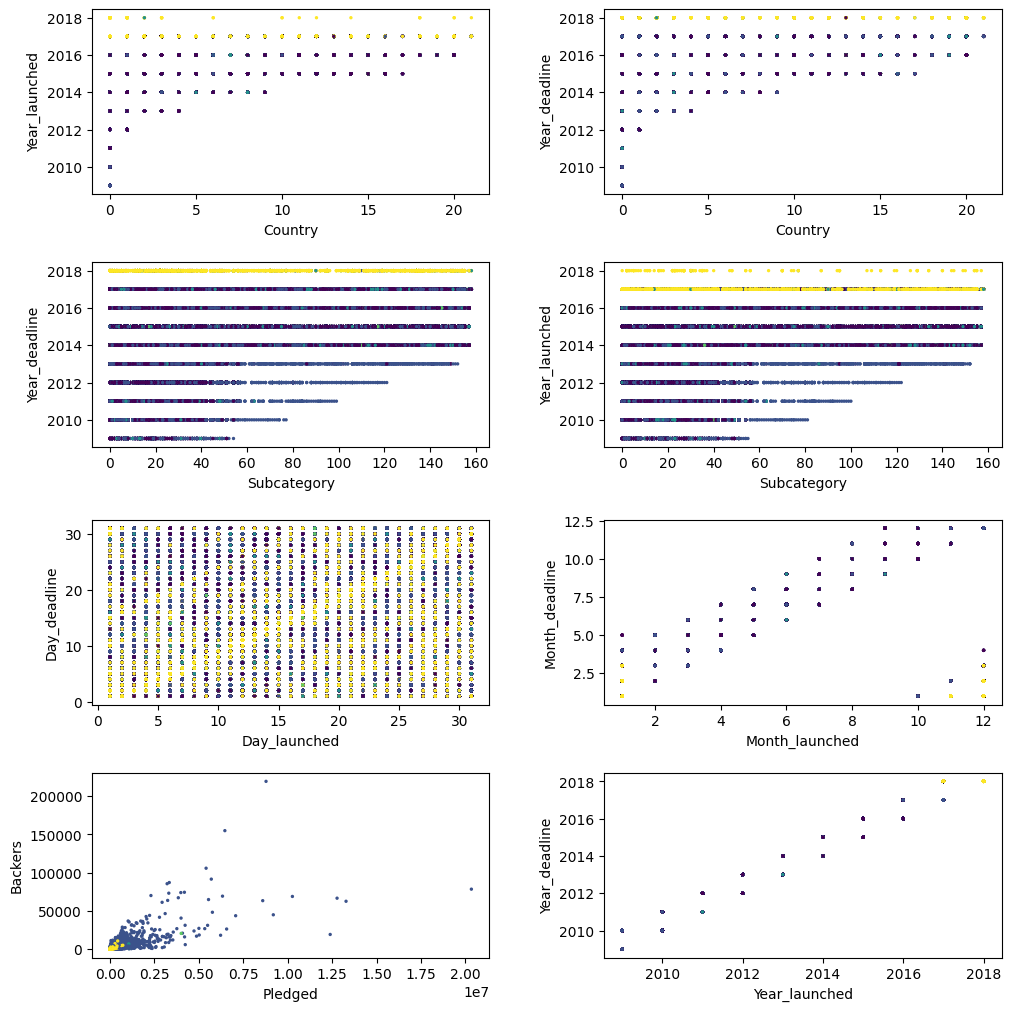

In [12]:
%matplotlib inline

pairs = [['Subcategory', 'Year_deadline'],
         ['Subcategory', 'Year_launched'],
         ['Country', 'Year_deadline'],
         ['Country', 'Year_launched'],
         ['Pledged', 'Backers'],
         ['Year_launched', 'Year_deadline'],
         ['Month_launched', 'Month_deadline'],
         ['Day_launched', 'Day_deadline'],
         ]
pairs = sorted(pairs, key=lambda a: data.corr().loc[a[0], a[1]])
states = data['State']

ncols = 2
nrows = (len(pairs) + (len(pairs) % 2)) // 2
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
grid = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)
grid.update(wspace=.1, hspace=.1)
for i in range(nrows):
    for j in range(ncols - len(pairs) % 2):
        ax = fig.add_subplot(grid[i, j])
        ax.set_xlabel(pairs[i * 2 + j][0])
        ax.set_ylabel(pairs[i * 2 + j][1])
        ax.scatter(data[pairs[i * 2 + j][0]], data[pairs[i * 2 + j][1]], s=np.ones([states.shape[0], 1])*2, c=states)


# Распределение

array([[<Axes: title={'center': 'Category'}>,
        <Axes: title={'center': 'Subcategory'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Goal'}>],
       [<Axes: title={'center': 'Pledged'}>,
        <Axes: title={'center': 'Backers'}>,
        <Axes: title={'center': 'State'}>,
        <Axes: title={'center': 'Year_launched'}>],
       [<Axes: title={'center': 'Month_launched'}>,
        <Axes: title={'center': 'Day_launched'}>,
        <Axes: title={'center': 'Hours_launched'}>,
        <Axes: title={'center': 'Minutes_launched'}>],
       [<Axes: title={'center': 'Seconds_launched'}>,
        <Axes: title={'center': 'Year_deadline'}>,
        <Axes: title={'center': 'Month_deadline'}>,
        <Axes: title={'center': 'Day_deadline'}>]], dtype=object)

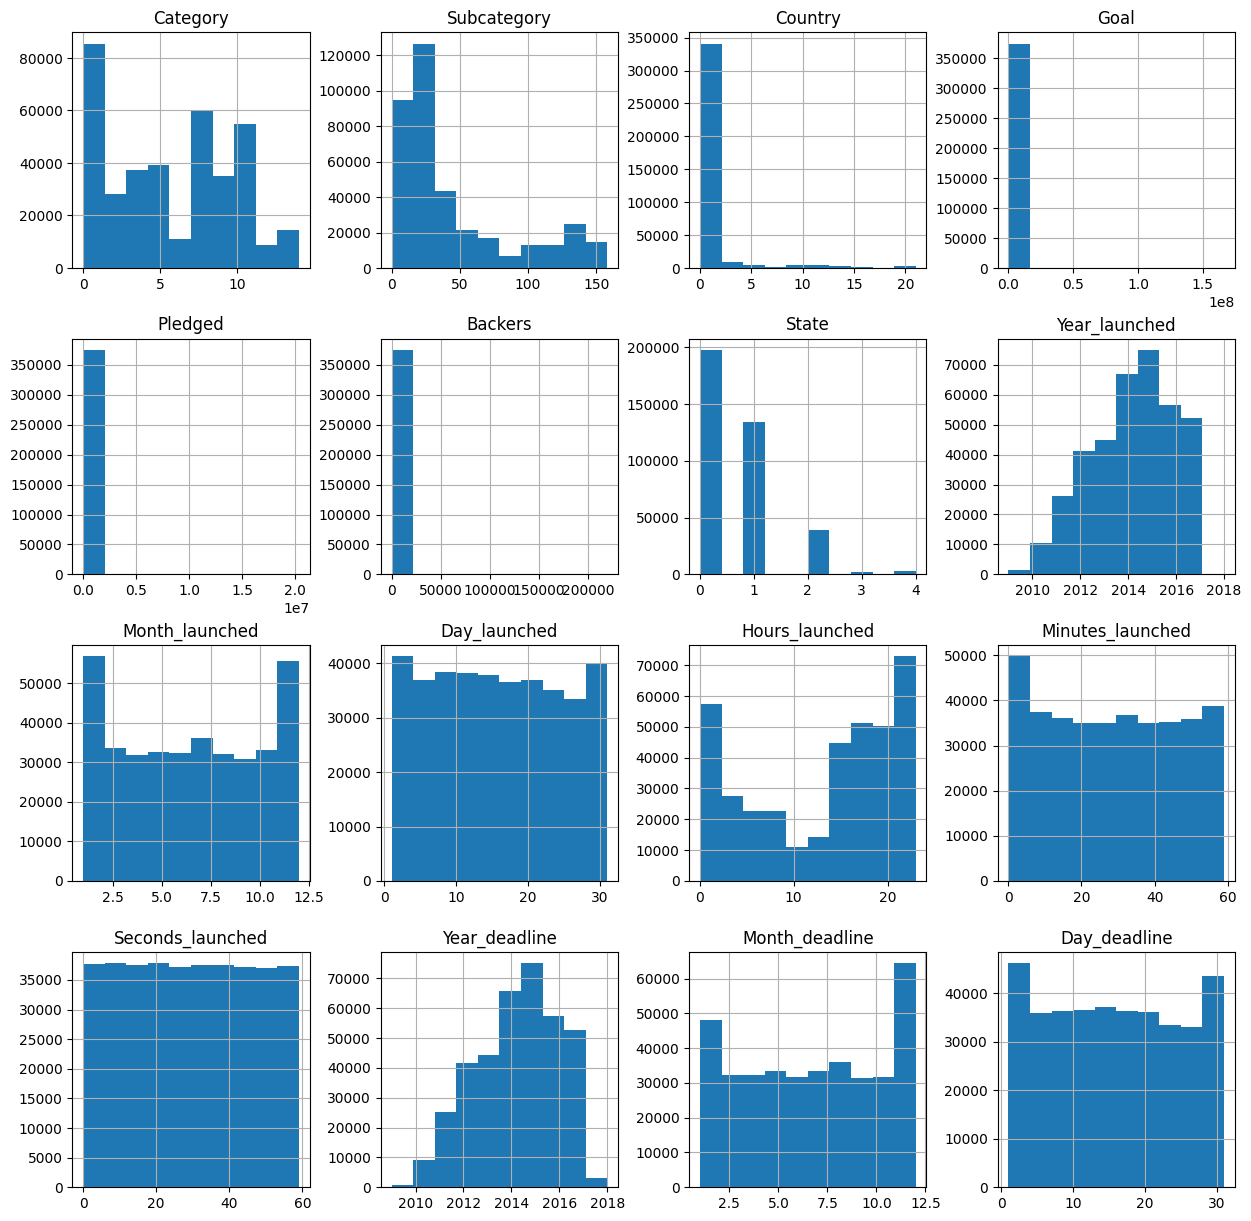

In [15]:
data.hist(figsize=(15, 15))

## Проверка нормального распределения.

<b>Критерий Шапиро-Уилка</b> используется для проверки гипотезы $H_0$: «случайная величина $X$ распределена нормально» и является одним наиболее эффективных критериев проверки нормальности. Критерии, проверяющие нормальность выборки, являются частным случаем критериев согласия. Если выборка нормальна, можно далее применять мощные параметрические критерии, например, критерий Фишера.

In [20]:
[(i, scipy.stats.shapiro(data[i]).pvalue) for i in data.columns]

c:\Users\Mike\Desktop\KickStarterProjects\KickstarterProjects\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


[('Category', 0.0),
 ('Subcategory', 0.0),
 ('Country', 0.0),
 ('Goal', 0.0),
 ('Pledged', 0.0),
 ('Backers', 0.0),
 ('State', 0.0),
 ('Year_launched', 0.0),
 ('Month_launched', 0.0),
 ('Day_launched', 0.0),
 ('Hours_launched', 0.0),
 ('Minutes_launched', 0.0),
 ('Seconds_launched', 0.0),
 ('Year_deadline', 0.0),
 ('Month_deadline', 0.0),
 ('Day_deadline', 0.0)]

<b>Критерий согласия Колмогорова</b> предназначен для проверки гипотезы о принадлежности выборки некоторому закону распределения, то есть проверки того, что эмпирическое распределение соответствует предполагаемой модели.

<b>Критерий однородности Смирнова</b> используется для проверки гипотезы о принадлежности двух независимых выборок одному закону распределения, то есть о том, что два эмпирических распределения соответствуют одному и тому же закону.

Эти критерии носят имена математиков Андрея Николаевича Колмогорова и Николая Васильевича Смирнова.

Критерий Смирнова о проверке гипотезы об однородности двух эмпирических законов распределения является одним из наиболее часто используемых непараметрических критериев.

In [22]:
[(i, scipy.stats.kstest(data[i], 'norm').pvalue) for i in data.columns]


[('Category', 0.0),
 ('Subcategory', 0.0),
 ('Country', 0.0),
 ('Goal', 0.0),
 ('Pledged', 0.0),
 ('Backers', 0.0),
 ('State', 0.0),
 ('Year_launched', 0.0),
 ('Month_launched', 0.0),
 ('Day_launched', 0.0),
 ('Hours_launched', 0.0),
 ('Minutes_launched', 0.0),
 ('Seconds_launched', 0.0),
 ('Year_deadline', 0.0),
 ('Month_deadline', 0.0),
 ('Day_deadline', 0.0)]

<b>Классический непараметрический критерий согласия Андерсона-Дарлинга</b> предназначен для проверки простых гипотез о принадлежности анализируемой выборки полностью известному закону (о согласии эмпирического распределения $F_n(x)$ и теоретического закона $F(x,\theta )$) , то есть для проверки гипотез вида $H_{0}:F_{n}(x)=F(x,\theta )$ с известным вектором параметров теоретического закона.

In [24]:
[(i, scipy.stats.anderson(data[i])) for i in data.columns]


[('Category',
  AndersonResult(statistic=8278.019773888635, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.651116571029177, scale=3.912752773868569)
   success: True
   message: '`anderson` successfully fit the distribution to the data.')),
 ('Subcategory',
  AndersonResult(statistic=28417.321964366827, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=44.179819822703834, scale=43.30145997531131)
   success: True
   message: '`anderson` successfully fit the distribution to the data.')),
 ('Country',
  AndersonResult(statistic=95692.92061069293, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.9801335456832412, scale=2.9933442393664143)
   success: True
   message: '`anderson

##  Проверка других

In [30]:
[(i, scipy.stats.kstest(data[i], 'expon').pvalue) for i in data.columns]


[('Category', 0.0),
 ('Subcategory', 0.0),
 ('Country', 0.0),
 ('Goal', 0.0),
 ('Pledged', 0.0),
 ('Backers', 0.0),
 ('State', 0.0),
 ('Year_launched', 0.0),
 ('Month_launched', 0.0),
 ('Day_launched', 0.0),
 ('Hours_launched', 0.0),
 ('Minutes_launched', 0.0),
 ('Seconds_launched', 0.0),
 ('Year_deadline', 0.0),
 ('Month_deadline', 0.0),
 ('Day_deadline', 0.0)]

In [35]:
[(i, scipy.stats.kstest(data[i], 'laplace').pvalue) for i in data.columns]


[('Category', 0.0),
 ('Subcategory', 0.0),
 ('Country', 0.0),
 ('Goal', 0.0),
 ('Pledged', 0.0),
 ('Backers', 0.0),
 ('State', 0.0),
 ('Year_launched', 0.0),
 ('Month_launched', 0.0),
 ('Day_launched', 0.0),
 ('Hours_launched', 0.0),
 ('Minutes_launched', 0.0),
 ('Seconds_launched', 0.0),
 ('Year_deadline', 0.0),
 ('Month_deadline', 0.0),
 ('Day_deadline', 0.0)]

In [40]:
[(i, scipy.stats.kstest(data[i], lambda a: scipy.stats.geom.cdf(a, p=1 / np.mean(a))).pvalue) for i in data.columns]


[('Category', 0.0),
 ('Subcategory', 0.0),
 ('Country', nan),
 ('Goal', 0.0),
 ('Pledged', 0.0),
 ('Backers', 0.0),
 ('State', nan),
 ('Year_launched', 0.0),
 ('Month_launched', 0.0),
 ('Day_launched', 0.0),
 ('Hours_launched', 0.0),
 ('Minutes_launched', 0.0),
 ('Seconds_launched', 0.0),
 ('Year_deadline', 0.0),
 ('Month_deadline', 0.0),
 ('Day_deadline', 0.0)]

In [44]:
[(i, scipy.stats.kstest(data[i], lambda a: scipy.stats.binom.cdf(a, n=len(a), p=np.mean(a) / len(a))).pvalue) for i in data.columns]


[('Category', 0.0),
 ('Subcategory', 0.0),
 ('Country', 0.0),
 ('Goal', 0.0),
 ('Pledged', 0.0),
 ('Backers', 0.0),
 ('State', 0.0),
 ('Year_launched', 0.0),
 ('Month_launched', 0.0),
 ('Day_launched', 0.0),
 ('Hours_launched', 0.0),
 ('Minutes_launched', 0.0),
 ('Seconds_launched', 0.0),
 ('Year_deadline', 0.0),
 ('Month_deadline', 0.0),
 ('Day_deadline', 0.0)]

In [46]:
[(i, scipy.stats.chisquare(data[i]).pvalue) for i in data.columns]

[('Category', 0.0),
 ('Subcategory', 0.0),
 ('Country', 0.0),
 ('Goal', 0.0),
 ('Pledged', 0.0),
 ('Backers', 0.0),
 ('State', 1.0),
 ('Year_launched', 1.0),
 ('Month_launched', 0.0),
 ('Day_launched', 0.0),
 ('Hours_launched', 0.0),
 ('Minutes_launched', 0.0),
 ('Seconds_launched', 0.0),
 ('Year_deadline', 1.0),
 ('Month_deadline', 0.0),
 ('Day_deadline', 0.0)]